# Report 1
## Sorting algorithms

#### Marcin Kapiszewski 156048
#### Adam Tomys 156057

Group 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Program_Evaluation.Generate_input import *
from Sorting_algorithms.Bubble_sort import bubble_sort
from Sorting_algorithms.Quick_sort import quick_sort
from Sorting_algorithms.Insertion_sort import insert_sort
from Sorting_algorithms.Counting_sort import counting_sort
from Sorting_algorithms.Heap_sort import heap_sort
from Program_Evaluation.Evaluate_program import evaluate_program
from Vizualization.Vizualization import compare_sorting_times
import sys

In [3]:
sys.setrecursionlimit(int(1e8))

In [4]:
SORTS = (quick_sort, heap_sort, counting_sort, bubble_sort, insert_sort)
INPUT_TYPES = ('generate_random', generate_increasing, generate_decreasing, generate_v_shape)
INPUT_DENSITIES = ('generate_standard', generate_condense, generate_sparse)
INPUT_SIZES = [100, 1_000, 2_000, 5_000]
STANDARD_SIZE = 5_000
generate_standard = generate_random

In [5]:
def get_times(sort):
    time_size = {}
    for input_size in INPUT_SIZES:
        time_size[input_size] = evaluate_program(sort, generate_standard, input_size)

    time_type = {"generate_random": time_size[STANDARD_SIZE]}
    for input_type in INPUT_TYPES[1:]:       
        time_type[input_type.__name__] = evaluate_program(sort, input_type)
    
    time_density = {"generate_standard": time_size[STANDARD_SIZE]}
    for input_density in INPUT_DENSITIES[1:]:
        time_density[input_density.__name__] = evaluate_program(sort, input_density)

    return time_size, time_type, time_density

In [6]:
times = {}
for sort in SORTS:
    times[sort.__name__] = get_times(sort)

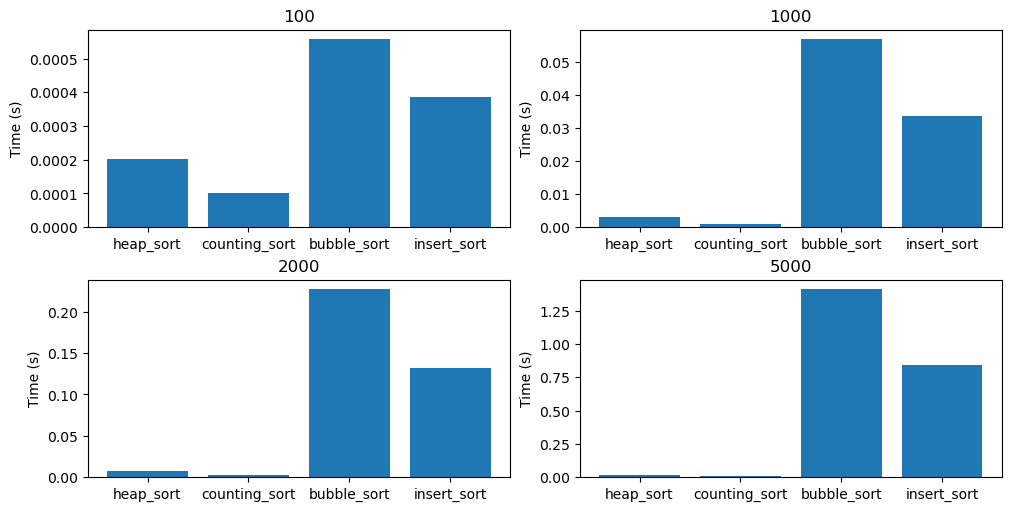

In [10]:
compare_sorting_times(INPUT_SIZES, times, 0)

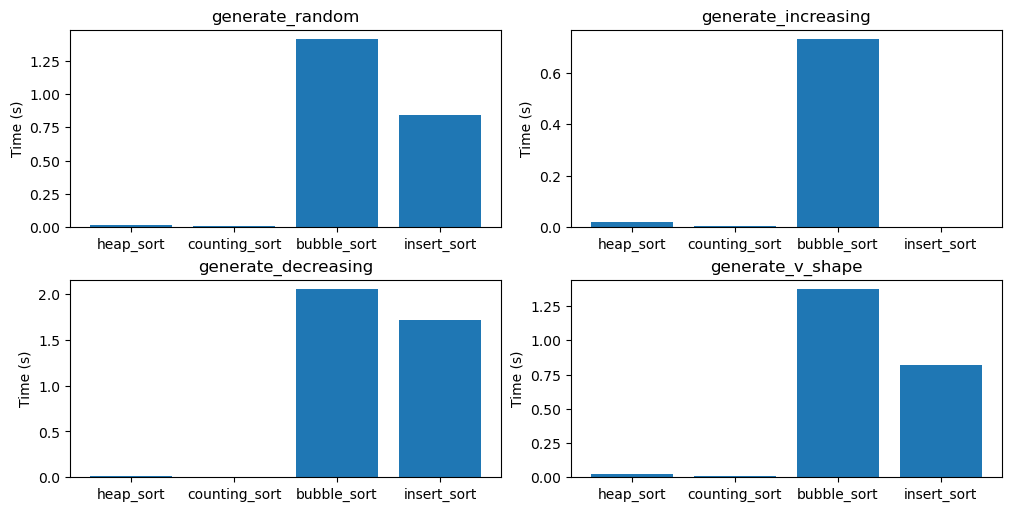

In [11]:
compare_sorting_times(INPUT_TYPES, times, 1)

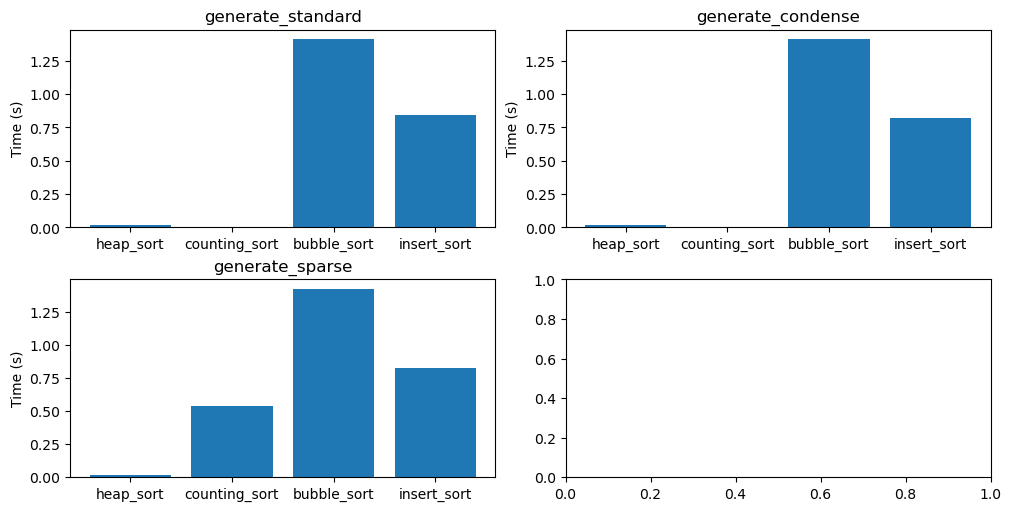

In [12]:
compare_sorting_times(INPUT_DENSITIES, times, 2)